In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import os,re , string
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers.embeddings import Embedding

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data_1 = pd.read_json("/content/drive/My Drive/Colab Notebooks/Sarcasm_Headlines_Dataset_v1.json",lines=True)
data_2 = pd.read_json("/content/drive/My Drive/Colab Notebooks/Sarcasm_Headlines_Dataset_v2.json",lines=True)

In [4]:
data =  pd.concat([data_1, data_2])
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [5]:
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [6]:
def CleanTokenize(df):
    head_lines = list()
    lines = df["headline"].values.tolist()

    for line in lines:
        line = clean_text(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

In [7]:
head_lines = CleanTokenize(data)
head_lines[0:20]

[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'secret',
  'black',
  'code',
  'minority',
  'shoppers'],
 ['roseanne',
  'revival',
  'catches',
  'thorny',
  'political',
  'mood',
  'better',
  'worse'],
 ['mom',
  'starting',
  'fear',
  'sons',
  'web',
  'series',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'wants',
  'wife',
  'listen',
  'come',
  'alternative',
  'debtreduction',
  'ideas'],
 ['jk', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'magical', 'way'],
 ['advancing', 'worlds', 'women'],
 ['fascinating', 'case', 'eating', 'labgrown', 'meat'],
 ['ceo', 'send', 'kids', 'school', 'work', 'company'],
 ['top', 'snake', 'handler', 'leaves', 'sinking', 'huckabee', 'campaign'],
 ['fridays', 'morning', 'email', 'inside', 'trumps', 'presser', 'ages'],
 ['airline',
  'passengers',
  'tackle',
  'man',
  'rushes',
  'cockpit',
  'bomb',
  'threat'],
 ['facebook', 'reportedly', 'working', 'healthcare', 'features', 'apps'],
 ['north',
  'korea',
  'pr

(-0.5, 999.5, 499.5, -0.5)

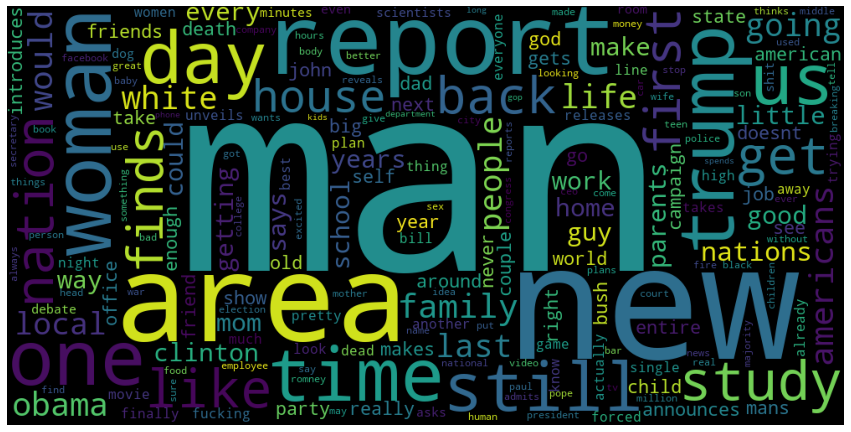

In [ ]:
pos_data = data.loc[data['is_sarcastic'] == 1]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 999.5, 499.5, -0.5)

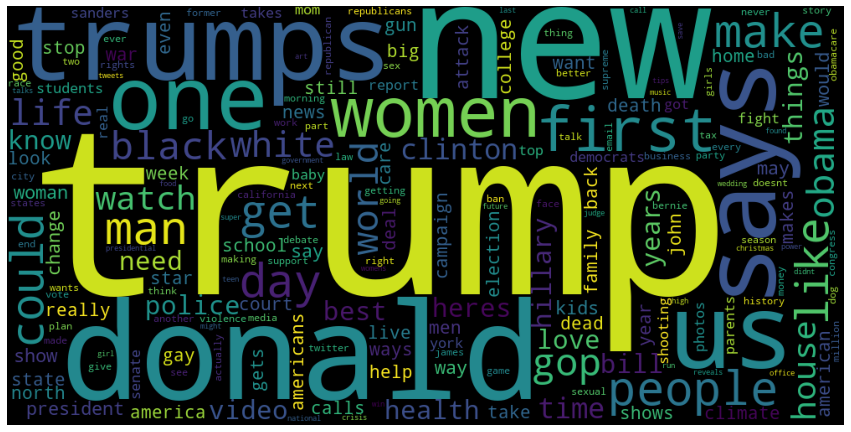

In [ ]:
pos_data = data.loc[data['is_sarcastic'] == 0]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

In [8]:
validation_split = 0.2
max_length = 25


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(head_lines)
sequences = tokenizer_obj.texts_to_sequences(head_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - ",len(word_index))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab size -', vocab_size)

unique tokens -  28657
vocab size - 28658


In [ ]:
lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')
sentiment =  data['is_sarcastic'].values

indices = np.arange(lines_pad.shape[0])
np.random.shuffle(indices)
lines_pad = lines_pad[indices]
sentiment = sentiment[indices]

In [ ]:
num_validation_samples = int(validation_split * lines_pad.shape[0])

X_train_pad = lines_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = lines_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

In [ ]:
print('Shape of X_train_pad:', X_train_pad.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_pad:', X_test_pad.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train_pad: (44263, 25)
Shape of y_train: (44263,)
Shape of X_test_pad: (11065, 25)
Shape of y_test: (11065,)


In [ ]:
embeddings_index = {}
embedding_dim = 100
GLOVE_DIR = "/content/drive/My Drive/Colab Notebooks"
f = open(os.path.join(GLOVE_DIR, 'glove.twitter.27B.100d.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
c = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        c+=1
        embedding_matrix[i] = embedding_vector
print(c)

24755


In [ ]:
embedding_layer = Embedding(len(word_index) + 1,embedding_dim,weights=[embedding_matrix],
                            input_length=max_length,trainable=False)

In [ ]:
## Building RNN Model using some layers
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 100)           2865800   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 2,908,105
Trainable params: 42,305
Non-trainable params: 2,865,800
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train_pad, y_train, batch_size=32, 
                    epochs=25, validation_data=(X_test_pad, y_test), 
                    verbose=2)

Epoch 1/25
1384/1384 - 68s - loss: 0.5130 - acc: 0.7453 - val_loss: 0.4342 - val_acc: 0.8010
Epoch 2/25
1384/1384 - 44s - loss: 0.4303 - acc: 0.8019 - val_loss: 0.3981 - val_acc: 0.8148
Epoch 3/25
1384/1384 - 44s - loss: 0.3860 - acc: 0.8276 - val_loss: 0.3805 - val_acc: 0.8286
Epoch 4/25
1384/1384 - 44s - loss: 0.3634 - acc: 0.8416 - val_loss: 0.3600 - val_acc: 0.8438
Epoch 5/25
1384/1384 - 44s - loss: 0.3380 - acc: 0.8513 - val_loss: 0.3434 - val_acc: 0.8507
Epoch 6/25
1384/1384 - 45s - loss: 0.3169 - acc: 0.8638 - val_loss: 0.3318 - val_acc: 0.8611
Epoch 7/25
1384/1384 - 45s - loss: 0.3035 - acc: 0.8716 - val_loss: 0.3311 - val_acc: 0.8636
Epoch 8/25
1384/1384 - 44s - loss: 0.2864 - acc: 0.8796 - val_loss: 0.3013 - val_acc: 0.8718
Epoch 9/25
1384/1384 - 43s - loss: 0.2727 - acc: 0.8850 - val_loss: 0.2953 - val_acc: 0.8801
Epoch 10/25
1384/1384 - 43s - loss: 0.2655 - acc: 0.8882 - val_loss: 0.2894 - val_acc: 0.8829
Epoch 11/25
1384/1384 - 44s - loss: 0.2550 - acc: 0.8929 - val_loss: 

In [ ]:
_,acc = model.evaluate(X_test_pad, y_test)
print("Accuracy = ",(acc*100.0),"%")

346/346 [==============================] - 2s 6ms/step - loss: 0.2250 - acc: 0.9226
Accuracy =  92.26389527320862 %


In [ ]:
y_pred = model.predict(X_test_pad)
y_pred = (y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
Confusion_Matrix = confusion_matrix(y_test,y_pred)

Text(0.5, 51.0, 'Predicted Labels')

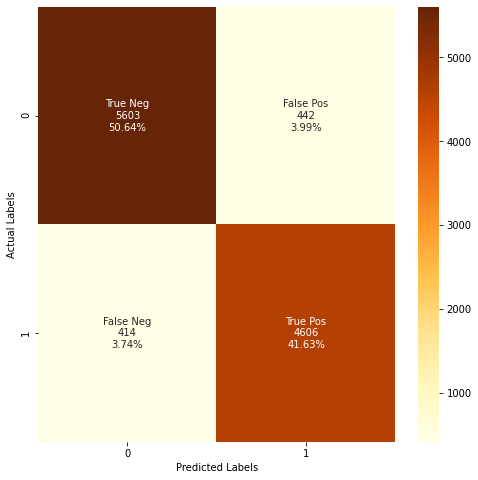

In [ ]:
plt.figure(figsize=(8,8))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in Confusion_Matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in Confusion_Matrix.flatten()/np.sum(Confusion_Matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(Confusion_Matrix, annot=labels, fmt='', cbar=True,cmap='YlOrBr')

plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

In [ ]:
# Plot results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

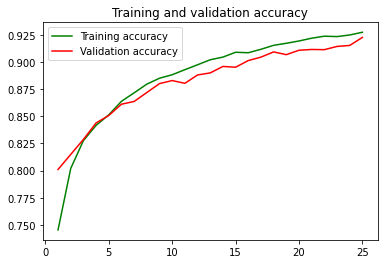

In [ ]:
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

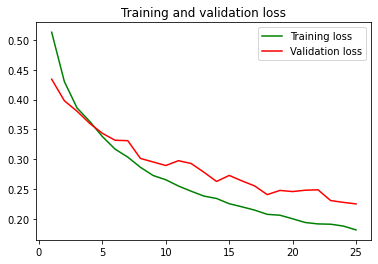

In [ ]:
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
## Saving our model so that we dont try our model again again 
model.save('/content/drive/My Drive/Colab Notebooks/Detection_model.h5')

In [9]:
from keras.models import load_model

In [10]:
sarcasm_model = load_model('/content/drive/My Drive/Colab Notebooks/Detection_model.h5')

In [11]:
def predict_sarcasm(s):
    x_final = pd.DataFrame({"headline":[s]})
    test_lines = CleanTokenize(x_final)
    test_sequences = tokenizer_obj.texts_to_sequences(test_lines)
    test_review_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post')
    pred = sarcasm_model.predict(test_review_pad)
    pred*=100
    if pred[0][0]>=50: return "It's a sarcasm!" 
    else: return "It's not a sarcasm."

In [13]:
predict_sarcasm("I was depressed. He asked me to be happy. I am not depressed anymore.")

"It's a sarcasm!"

In [14]:
predict_sarcasm("You just broke my car window. Great job.")

"It's a sarcasm!"

In [ ]:
predict_sarcasm("You just saved my dog's life. Thanks a million.")

"It's not a sarcasm."

In [ ]:
predict_sarcasm("Ah shit here we go again.")

"It's a sarcasm!"

In [ ]:
predict_sarcasm("My cancer is not going to make me deaf")

"It's not a sarcasm."

In [ ]:
predict_sarcasm("secret service agent not so secret about being david alan grier fan.")

"It's a sarcasm!"

In [ ]:
predict_sarcasm("this new orange era: the growing divide")

"It's not a sarcasm."

In [ ]:
predict_sarcasm("things learned in the first month of having a baby")

"It's not a sarcasm."

In [ ]:
predict_sarcasm("expansive obama state of the union speech to touch on patent law, entomology, the films of robert altman")

"It's a sarcasm!"